In [4]:
import re
import pandas as pd
from googletrans import Translator
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
from tqdm import tqdm
import os
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt


###  1.手動でinstagramからコピーしてきたコメントから、コメント部分のみの抽出


34週間前

karina : "giselle adalah penyeimbang getaran aespa" auranya hot banget😭💥

expndomのプロフィール写真

expndom


手動でコピーするとこのようになるため、コメント部分のみ抽出してＣＳＶに格納

### 使用した投稿

aespa1 https://www.instagram.com/p/C7wW9aqvTTq/

aespa2 https://www.instagram.com/p/C7n7A1KPT_T/

aespa3 https://www.instagram.com/p/C7d7_9KPTSC/

aespa4 https://www.instagram.com/p/C7auGE1PX0_/

aespa5 https://www.instagram.com/p/C7UEQYLPMNk/

aespa6 https://www.instagram.com/p/C7JFuBxyij2/

aesap7 https://www.instagram.com/p/C7Gg18nLFpq/

aespa8 https://www.instagram.com/p/C654IvXL6Tf/

In [7]:
# テキストファイルのパスをリストで定義
file_paths = [
    r"C:\VScode\muds\zemi\-b1\txt\aespa1.txt",
    r"C:\VScode\muds\zemi\-b1\txt\aespa2.txt",
    r"C:\VScode\muds\zemi\-b1\txt\aespa3.txt",
    r"C:\VScode\muds\zemi\-b1\txt\aespa4.txt",
    r"C:\VScode\muds\zemi\-b1\txt\aespa5.txt",
    r"C:\VScode\muds\zemi\-b1\txt\aespa6.txt",
    r"C:\VScode\muds\zemi\-b1\txt\aespa7.txt",
    r"C:\VScode\muds\zemi\-b1\txt\aespa8.txt",
]

# 全コメントを格納するリスト
all_comments = []

# 各ファイルを処理
for file_path in file_paths:
    extracted_comments = []  # 各画像ごとのコメントリスト

    # ファイルを開いて行ごとに読み込む
    with open(file_path, "r", encoding="utf-8") as f:
        lines = f.readlines()

    # 数字の次の行を抽出
    for i in range(len(lines) - 1):
        if re.search(r"\d+週間前", lines[i]):  # 数字＋"週間前"を検索
            comment = lines[i + 1].strip()  # 次の行を抽出
            if comment:  # コメントが空白でない場合のみ追加
                extracted_comments.append({"Image Name": file_path.split("\\")[-1], "Comment": comment})

    # 各ファイルのコメントを全体リストに追加
    all_comments.extend(extracted_comments)

# データをDataFrameに変換
df = pd.DataFrame(all_comments)

# 結果をCSVに保存
df.to_csv("all_comments.csv", index=False, encoding="utf-8")
print("すべてのコメントが 'all_comments.csv' に保存されました！")


すべてのコメントが 'all_comments.csv' に保存されました！


### 2.英語コメントを抽出



In [ ]:
import pandas as pd
import langdetect  # 言語検出用ライブラリ

# CSVデータの読み込み
data = pd.read_csv(r"CSV\all_comments.csv")

# 言語を検出する関数
def detect_language(comment):
    try:
        return langdetect.detect(comment)
    except:
        return "unknown"

# 言語列を追加
data['Language'] = data['Comment'].apply(detect_language)

# 英語のみを抽出
english_data = data[data['Language'] == 'en']

# 結果を確認
print(english_data.head())

# 英語のコメントのみを新しいCSVに保存
english_data.to_csv("english_comments.csv", index=False, encoding="utf-8")
print("Filtered English comments saved to 'english_comments.csv'")


In [2]:
import pandas as pd
from langdetect import detect
import logging

# ログの設定
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# CSVデータの読み込み
data = pd.read_csv("CSV/all_comments.csv")
logging.info("CSV file loaded successfully.")

# 英語コメントをフィルタリングする関数
def is_english(comment):
    try:
        lang = detect(comment)
        logging.debug(f"Detected language: {lang} for comment: {comment[:50]}")  # 最初の50文字を表示
        return lang == 'en'
    except Exception as e:
        logging.warning(f"Language detection failed for comment: {comment[:50]} - {str(e)}")
        return False

# 各コメントが英語かどうかを判定
logging.info("Starting language detection...")
data['Is English'] = data['Comment'].apply(is_english)
logging.info("Language detection completed.")

# 英語のコメントのみ抽出
english_comments = data[data['Is English']].drop(columns=['Is English'])
logging.info(f"Filtered {len(english_comments)} English comments out of {len(data)} total comments.")

# 結果を新しいCSVに保存
output_file = "english_comments_with_logs.csv"
english_comments.to_csv(output_file, index=False, encoding="utf-8")
logging.info(f"Filtered English comments saved to {output_file}.")


2025-01-29 06:08:38,767 - INFO - CSV file loaded successfully.
2025-01-29 06:08:38,769 - INFO - Starting language detection...
2025-01-29 06:08:39,275 - WARNING - Language detection failed for comment: 🔥 - No features in text.
2025-01-29 06:08:39,322 - WARNING - Language detection failed for comment: 🖤🖤🔥🔥 - No features in text.
2025-01-29 06:08:39,348 - WARNING - Language detection failed for comment: ❤️ - No features in text.
2025-01-29 06:08:39,351 - WARNING - Language detection failed for comment: ❤️ - No features in text.
2025-01-29 06:08:39,351 - WARNING - Language detection failed for comment: 😆👍 - No features in text.
2025-01-29 06:08:39,394 - WARNING - Language detection failed for comment: 😍😍😍😍😍😍 - No features in text.
2025-01-29 06:08:39,397 - WARNING - Language detection failed for comment: ❤️❤️❤️❤️ - No features in text.
2025-01-29 06:08:39,402 - WARNING - Language detection failed for comment: 😍😍😍😍 - No features in text.
2025-01-29 06:08:39,404 - WARNING - Language detecti

KeyboardInterrupt: 

In [8]:
# tqdmをpandasに統合
tqdm.pandas()

# 入力ファイルと出力ディレクトリの設定
input_file_path = 'CSV/all_comments.csv'  # 入力CSVファイルのパス
output_directory = 'CSV/'  # 出力ディレクトリ
output_file_name = 'english_only_comments.csv'  # 出力ファイル名
output_file_path = os.path.join(output_directory, output_file_name)

# CSVファイルの読み込み
print("CSVファイルを読み込んでいます...")
data = pd.read_csv(input_file_path)
print(f"データの読み込みが完了しました。行数: {len(data)}")

# 英語のコメントだけを抽出する関数
def is_english(comment):
    try:
        return detect(comment) == 'en'  # 英語の場合にTrueを返す
    except LangDetectException:
        return False  # 言語検出が失敗した場合はFalseを返す

# 英語コメントのみをフィルタリング
print("英語のコメントをフィルタリング中...")
data['Is_English'] = data['Comment'].astype(str).progress_apply(is_english)

# フィルタリング結果を取得
english_comments = data[data['Is_English'] == True]  # 英語のコメントだけを抽出
print(f"英語のコメント数: {len(english_comments)}")

# 出力ディレクトリが存在しない場合は作成
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
    print(f"出力ディレクトリを作成しました: {output_directory}")

# 結果を新しいCSVとして保存
english_comments.to_csv(output_file_path, index=False, encoding='utf-8-sig')
print(f"英語コメントのみを抽出したデータを {output_file_path} に保存しました！")


CSVファイルを読み込んでいます...
データの読み込みが完了しました。行数: 16363
英語のコメントをフィルタリング中...


100%|██████████| 16363/16363 [00:48<00:00, 337.65it/s]

英語のコメント数: 2268
英語コメントのみを抽出したデータを CSV/english_only_comments.csv に保存しました！


In [9]:
# CSVデータの読み込み
data = pd.read_csv("CSV/english_only_comments.csv")  # 必要に応じてパスを調整

# VADERの初期化
analyzer = SentimentIntensityAnalyzer()

# 感情スコアの計算関数
def calculate_sentiment(comment):
    scores = analyzer.polarity_scores(comment)
    return scores['compound']  # 総合スコア

# 各コメントに感情スコアを計算して新しい列に追加
data['Sentiment Score'] = data['Comment'].apply(calculate_sentiment)

# 人気/不人気を分類
data['Category'] = data['Sentiment Score'].apply(
    lambda x: 'Popular' if x > 0 else 'Unpopular' if x < 0 else 'Neutral'
)

# 結果を確認
print(data.head())

# 結果を新しいCSVに保存
data.to_csv("sentiment_analysis_results.csv", index=False, encoding="utf-8")
print("Analysis results saved to 'sentiment_analysis_results.csv'")


   Image Name                           Comment  Is_English  Sentiment Score  \
0  aespa1.txt  The pinterest girlies are back 😻        True           0.4588   
1  aespa1.txt                 giselle's mother🔥        True          -0.3400   
2  aespa1.txt           that hot girl is mine 🖤        True           0.6369   
3  aespa1.txt               NINGNING stop it 😭🫠        True          -0.6486   
4  aespa1.txt            Omg Winter I love you…        True           0.6369   

    Category  
0    Popular  
1  Unpopular  
2    Popular  
3  Unpopular  
4    Popular  
Analysis results saved to 'sentiment_analysis_results.csv'


In [16]:
# 画像ごとの平均スコアを計算
image_sentiment = data.groupby('Image Name')['Sentiment Score'].mean().reset_index()

# 人気/不人気を分類
image_sentiment['Category'] = image_sentiment['Sentiment Score'].apply(
    lambda x: 'Popular' if x > 0 else 'Unpopular' if x < 0 else 'Neutral'
)

# 結果
print(image_sentiment)

# 結果をCSVに保存
image_sentiment.to_csv("image_sentiment_summary.csv", index=False, encoding="utf-8")
print("Image sentiment summary saved to 'image_sentiment_summary.csv'")


   Image Name  Sentiment Score Category
0  aespa1.txt         0.111240  Popular
1  aespa2.txt         0.322193  Popular
2  aespa3.txt         0.098621  Popular
3  aespa4.txt         0.100558  Popular
4  aespa5.txt         0.007554  Popular
5  aespa6.txt         0.301871  Popular
6  aespa7.txt         0.158516  Popular
7  aespa8.txt         0.222216  Popular
Image sentiment summary saved to 'image_sentiment_summary.csv'


In [46]:
# ランキングを計算
image_sentiment['Rank'] = image_sentiment['Sentiment Score'].rank(ascending=False, method='dense')

# 人気度ランキングをスコアの降順に並べ替え
image_sentiment_sorted = image_sentiment.sort_values(by='Sentiment Score', ascending=False)

# 全ランキングを表示
print("Full Popularity Ranking:")
print(image_sentiment_sorted)

# 全ランキングをCSVに保存
image_sentiment_sorted.to_csv("image_popularity_full_ranking.csv", index=False, encoding="utf-8")
print("Full ranking saved to 'image_popularity_full_ranking.csv'")


Full Popularity Ranking:
   Image Name  Sentiment Score Category  Rank
1  aespa2.txt         0.322193  Popular   1.0
5  aespa6.txt         0.301871  Popular   2.0
7  aespa8.txt         0.222216  Popular   3.0
6  aespa7.txt         0.158516  Popular   4.0
0  aespa1.txt         0.111240  Popular   5.0
3  aespa4.txt         0.100558  Popular   6.0
2  aespa3.txt         0.098621  Popular   7.0
4  aespa5.txt         0.007554  Popular   8.0
Full ranking saved to 'image_popularity_full_ranking.csv'


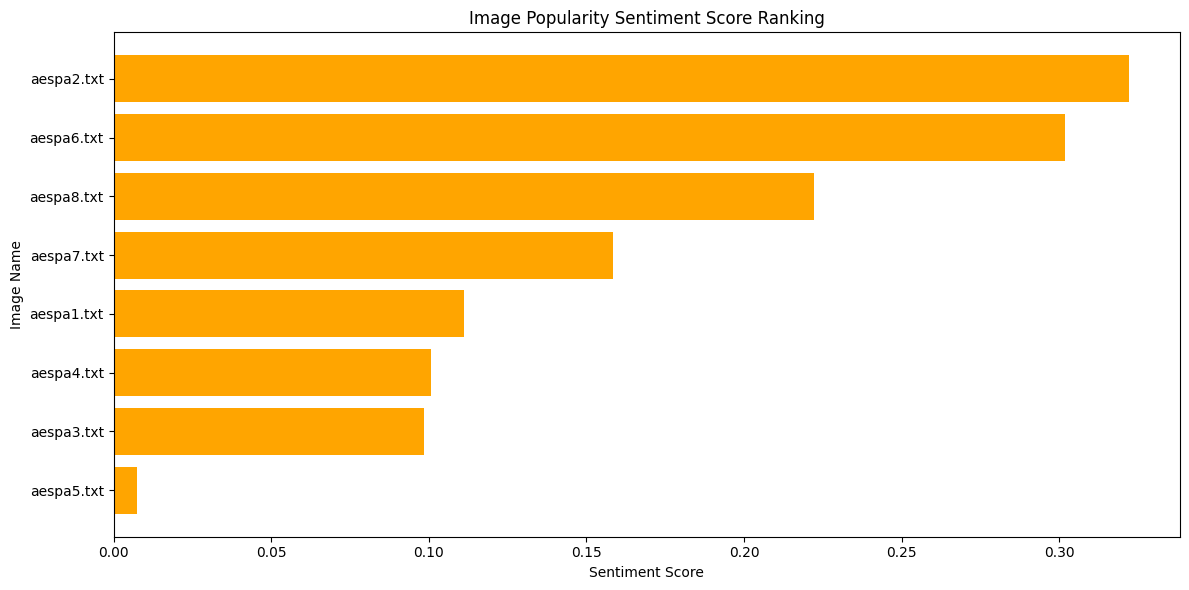

In [42]:
# 必要に応じてランキングのデータを再計算
image_sentiment['Rank'] = image_sentiment['Sentiment Score'].rank(ascending=False, method='dense')
image_sentiment_sorted = image_sentiment.sort_values(by='Sentiment Score', ascending=False)

# グラフ描画用のデータ準備
image_names = image_sentiment_sorted['Image Name']
scores = image_sentiment_sorted['Sentiment Score']

# 棒グラフの作成（ランキング順）
plt.figure(figsize=(12, 6))
plt.barh(image_names, scores, color='orange')
plt.xlabel('Sentiment Score')
plt.ylabel('Image Name')
plt.title('Image Popularity Sentiment Score Ranking')
plt.gca().invert_yaxis()  # 上位を上にする
plt.tight_layout()
plt.show()


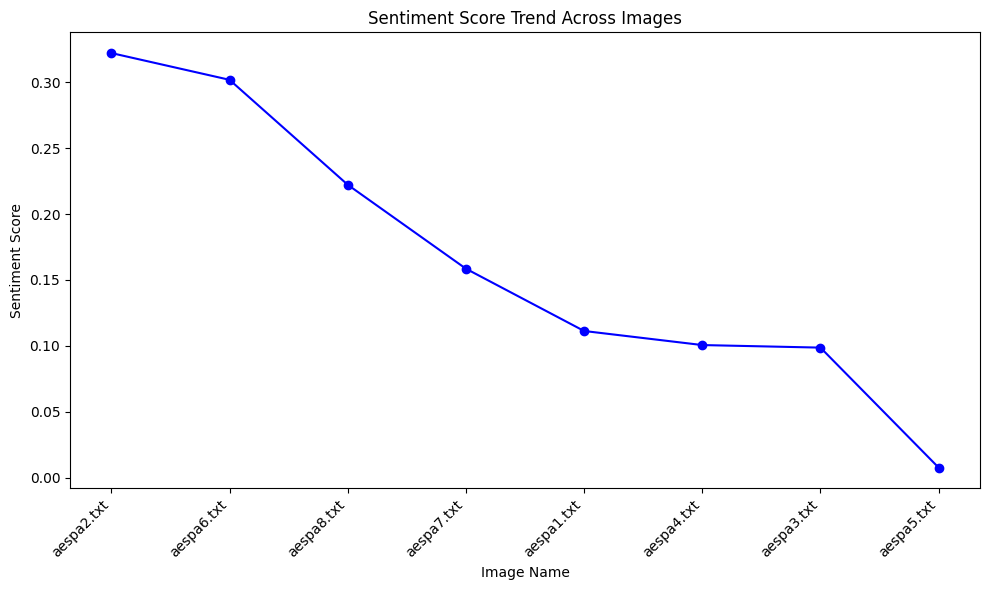

In [39]:
# スコアを時系列プロット
plt.figure(figsize=(10, 6))
plt.plot(image_sentiment_sorted['Image Name'], image_sentiment_sorted['Sentiment Score'], marker='o', linestyle='-', color='blue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Image Name')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score Trend Across Images')
plt.tight_layout()
plt.show()


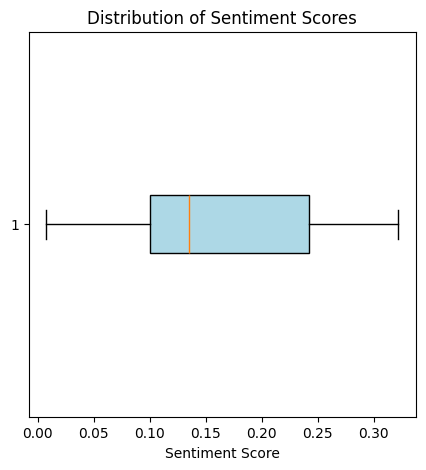

In [44]:
plt.figure(figsize=(5, 5))
plt.boxplot(scores, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.xlabel('Sentiment Score')
plt.title('Distribution of Sentiment Scores')
plt.show()


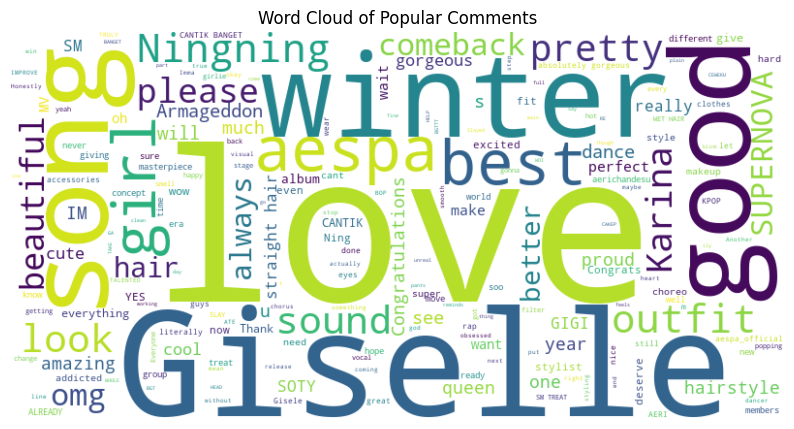

In [26]:
from wordcloud import WordCloud

# 人気コメントのテキストを結合
popular_comments = ' '.join(data[data['Category'] == 'Popular']['Comment'])

# ワードクラウド作成
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(popular_comments)

# 可視化
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Popular Comments')
plt.show()
